In [3]:
import numpy as np
import numpy.random as npr
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import rv_continuous
import time

Exercise 16

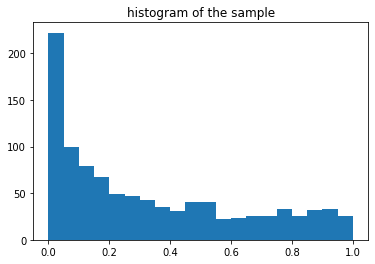

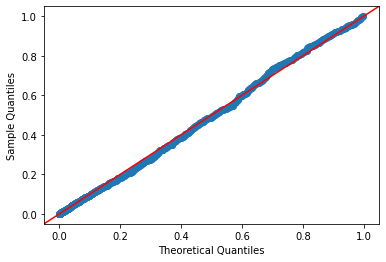

time elapsed: 4.9582s


In [4]:
tic = time.perf_counter()
N = 1000
npr.seed(0)
U = npr.random(size=N)
sample = U ** 2
plt.hist(sample, bins=20, range=(0,1),label='histogram')
plt.title("histogram of the sample")
plt.show()


class my_pi(rv_continuous):
    def _pdf(self,x):        
        return 1/2/np.sqrt(x)  # Normalized over its range, in this case [0,1]

dist = my_pi(a=0, b=1, name='my_pdf')
sm.qqplot(sample, dist=dist, line='45')
plt.show()
toc = time.perf_counter()
print(f"time elapsed: {toc - tic:.4f}s")

Exercise 18

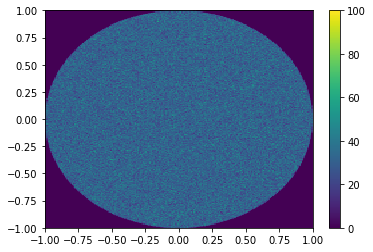

time elapsed: 1.0048s


In [5]:
tic = time.perf_counter()
N = int(1e6)
u0 = np.random.random(size=N)
u1 = np.random.random(size=N)
x1 = u0 ** 0.5 * np.cos(2 * np.pi * u1)
x2 = u0 ** 0.5 * np.sin(2 * np.pi * u1)
plt.hist2d(x1,x2,bins=200,range=[[-1,1],[-1,1]])
plt.clim(0,100)
plt.colorbar()
plt.show()
toc = time.perf_counter()
print(f"time elapsed: {toc - tic:.4f}s")

Exercise 19

In [6]:
def f(x=(0,0)):
    if x[0]**2 + x[1]**2 > 1:
        return 0
    return 1/np.pi

def g():
    return 1/4

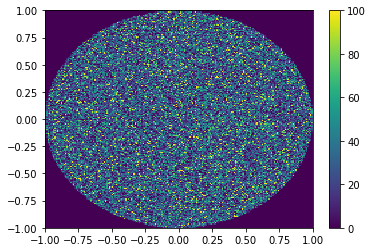

2.2810160000
time elapsed: 10.8129s


In [7]:
tic = time.perf_counter()
N = int(1e6)
K = np.sqrt(2)
X = np.zeros((N,2))
num_spl = np.ones(N)
x=(0,0)
for i in range(N):
    while not f(x) / K / g()> np.random.random():
        x = np.random.uniform(-1,1,size=2)
        num_spl[i] += 1
    X[i] = x
X = X.T
plt.hist2d(*X,bins=200,range=[[-1,1],[-1,1]])
plt.clim(0,100)
plt.colorbar()
plt.show()
toc = time.perf_counter()
print(f"{np.mean(num_spl)*2:.10f}")
print(f"time elapsed: {toc - tic:.4f}s")

Exercise 20

In [32]:
N = int(1e6)
for mu in np.arange(1, 3.5, 0.5):
    for sig in np.arange(0.3, 0.8, 0.1):
        if mu == 2 or sig == 0.5:
            npr.seed(0)
            x = npr.normal(mu, sig, size=N)
            Wk = (x>2) * norm.pdf(x,0,1) / norm.pdf(x,mu,sig) / N
            res = np.sum(Wk)
            act = 1-norm.cdf(2)
            print(f"mu:{mu:.1f},sigma:{sig:.1f}", end=" ")
            print(f"Estimated prob: {res:.6f}", end=" ")
            print(f"Abs Err: {abs(res-act):.6f}", end=" ")
            print(f"Var: {np.var(Wk*N):.6f}")

mu:1.0,sigma:0.5 Estimated prob: 0.022606 Abs Err: 0.000144 Var: 0.098143
mu:1.5,sigma:0.5 Estimated prob: 0.022746 Abs Err: 0.000004 Var: 0.005728
mu:2.0,sigma:0.3 Estimated prob: 0.022550 Abs Err: 0.000200 Var: 0.013986
mu:2.0,sigma:0.4 Estimated prob: 0.022758 Abs Err: 0.000008 Var: 0.001618
mu:2.0,sigma:0.5 Estimated prob: 0.022785 Abs Err: 0.000035 Var: 0.000617
mu:2.0,sigma:0.6 Estimated prob: 0.022787 Abs Err: 0.000036 Var: 0.000642
mu:2.0,sigma:0.7 Estimated prob: 0.022785 Abs Err: 0.000035 Var: 0.000764
mu:2.5,sigma:0.5 Estimated prob: 0.022737 Abs Err: 0.000013 Var: 0.000556
mu:3.0,sigma:0.5 Estimated prob: 0.022766 Abs Err: 0.000016 Var: 0.002986


The codes below are designed to analysis the behavior of variances when $\mu$ or $\sigma$ changes.

In [9]:
N = int(1e6)
    
def _err(mu, sig):
    npr.seed(0)
    x = npr.normal(mu, sig, size=N)
    Wx = (x>2) * norm.pdf(x,0,1) / norm.pdf(x,mu,sig)/N
    return np.sum(Wx)-(1-norm.cdf(2))

def _var(mu, sig):
    npr.seed(0)
    x = npr.normal(mu, sig, size=N)
    Wx = (x>2) * norm.pdf(x,0,1) / norm.pdf(x,mu,sig)
    return np.var(Wx)

err = np.vectorize(_err, otypes=[np.float64])
var = np.vectorize(_var, otypes=[np.float64])


def bi_plot(mu, rs1, var1, str_title, xlim):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(mu, rs1, label = "Abs Error")
    ax1.set_ylabel(r'Absolute Error ( $\times 10^{-5}$)')
    ax1.set_title(str_title)
    ax1.legend(loc="upper left")

    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(mu, var1,'orange', label = "Var")
    ax2.set_ylabel(r'Variance ( $\times 10^{-3}$)')
    ax2.set_xlim(xlim)
    ax2.legend(loc="upper right")

    plt.legend()
    plt.show()

We fix $\sigma=1.0$ and apply changes to $\mu$:

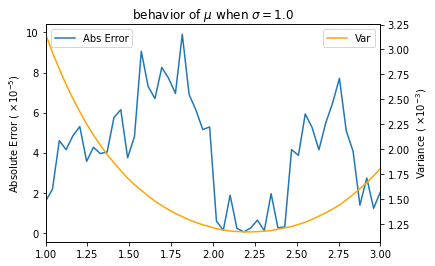

In [10]:
mu = np.linspace(1,3)
rs1 = np.abs(err(mu,1)) * 1e5
var1 = var(mu,1) * 1e3
str_title = "behavior of $\mu$ when $\sigma=1.0$"
xlim = [1,3]
bi_plot(mu, rs1, var1, str_title, xlim)

We fix $\mu=2.0$ and apply changes to $\sigma$:

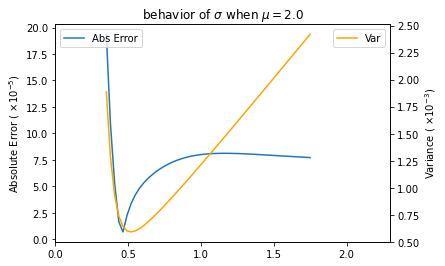

In [11]:
N = int(1e5) # 1e5 is enough for a smooth plot
mu = 2.0
sig = np.linspace(0.35, 1.75)
rs2 = np.abs(err(mu, sig)) * 1e5
var2 = var(mu, sig) * 1e3
xlim = [0,2.3]
str_title = "behavior of $\sigma$ when $\mu=2.0$"
bi_plot(sig, rs2, var2, str_title, xlim)

Exercise 21

In [12]:
p = lambda x: np.exp(-(abs(x)**3))
N = int(1e6)
x = np.random.normal(0,1,N)
res = p(x)/norm.pdf(x,0,1)
print (f"The numerical estimation of the normalization constant is {np.mean(res):.6f}")
act = 1.785959023138498
print(f"the absolute error is {abs(np.mean(res)-act):.10f}")

The numerical estimation of the normalization constant is 1.785614
the absolute error is 0.0003449061


Exercise 22

In [57]:
N = int(1e6)
for mu in np.arange(1, 3.5, 0.5):
    for sig in np.arange(0.3, 0.8, 0.1):
        if mu == 2 or sig == 0.5:
            npr.seed(0)
            x = npr.normal(mu,sig,N)
            W = norm.pdf(x,0,1)/norm.pdf(x,mu,sig)
            denom = np.sum(W)
            Wk = x * (x>2) * W / denom
            res = np.sum(Wk)
            act = 1-norm.cdf(2)
            print(f"mu:{mu:.1f},sigma:{sig:.1f}", end=" ")
            print(f"Estimated prob: {res:.6f}", end=" ")
            print(f"Abs Err: {abs(res-act):.6f}", end=" ")
            print(f"Var: {np.var(Wk*denom):.6f}")

mu:1.0,sigma:0.5 Estimated prob: 0.052626 Abs Err: 0.029876 Var: 0.891361
mu:1.5,sigma:0.5 Estimated prob: 0.054320 Abs Err: 0.031570 Var: 0.054205
mu:2.0,sigma:0.3 Estimated prob: 0.120856 Abs Err: 0.098106 Var: 0.152544
mu:2.0,sigma:0.4 Estimated prob: 0.077086 Abs Err: 0.054336 Var: 0.018183
mu:2.0,sigma:0.5 Estimated prob: 0.059227 Abs Err: 0.036477 Var: 0.004055
mu:2.0,sigma:0.6 Estimated prob: 0.052824 Abs Err: 0.030073 Var: 0.003234
mu:2.0,sigma:0.7 Estimated prob: 0.051750 Abs Err: 0.029000 Var: 0.003662
mu:2.5,sigma:0.5 Estimated prob: 0.071890 Abs Err: 0.049140 Var: 0.002313
mu:3.0,sigma:0.5 Estimated prob: 0.102190 Abs Err: 0.079440 Var: 0.013109


The codes below helps us to generate latex codes for tables

In [60]:
N = int(1e6)
print("$\\mu$ & $\\sigma$ & Err & Var & Err\\_ref & Var\\_ref\\\\")
for mu in np.arange(1, 3.5, 0.5):
    for sig in np.arange(0.3, 0.8, 0.1):
        if mu == 2 or sig == 0.5:
            npr.seed(0)
            x = npr.normal(mu, sig, size=N)
            W1 = (x>2) * norm.pdf(x,0,1) / norm.pdf(x,mu,sig) / N
            W2 = norm.pdf(x,0,1)/norm.pdf(x,mu,sig)
            denom = np.sum(W2)
            W2 = x * (x>2) * W2 / denom
            res1 = np.sum(W1)
            res2 = np.sum(W2)
            act = 1-norm.cdf(2)
            err1 = abs(res2-act)
            var1 = np.var(W2*denom)
            err2 = abs(res1-act)
            var2 = np.var(W1*N)
            print(f"{mu:.1f} & {sig:.1f} & {err1:.6f} & {var1:.6f} & {err2:.6f} & {var2:.6f}\\\\")

$\mu$ & $\sigma$ & Err & Var & Err\_ref & Var\_ref\\
1.0 & 0.5 & 0.029876 & 0.891361 & 0.000144 & 0.098143\\
1.5 & 0.5 & 0.031570 & 0.054205 & 0.000004 & 0.005728\\
2.0 & 0.3 & 0.098106 & 0.152544 & 0.000200 & 0.013986\\
2.0 & 0.4 & 0.054336 & 0.018183 & 0.000008 & 0.001618\\
2.0 & 0.5 & 0.036477 & 0.004055 & 0.000035 & 0.000617\\
2.0 & 0.6 & 0.030073 & 0.003234 & 0.000036 & 0.000642\\
2.0 & 0.7 & 0.029000 & 0.003662 & 0.000035 & 0.000764\\
2.5 & 0.5 & 0.049140 & 0.002313 & 0.000013 & 0.000556\\
3.0 & 0.5 & 0.079440 & 0.013109 & 0.000016 & 0.002986\\
